# Exploratory Data Analysis on UK Retailer Ecommerce Transaction Data

This dataset contains all the transactional data that was collected by the UK Retailer between 1st of December, 2010 to 9th of December, 2011.

Source: http://archive.ics.uci.edu/ml/datasets/online+retail

In [63]:
# import sys
# !{sys.executable} -m pip install TextBlob
# !{sys.executable} -m textblob.download_corpora
# my normal way isn't working

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [61]:
import pandas as pd
import numpy as np
from textblob import TextBlob

In [16]:
data = pd.read_csv('data/data.csv', index_col='InvoiceDate', parse_dates=True, encoding = 'ISO-8859-1')
# had to add in 'ISO-8859-1' for encoding because of some issue with 'utf-8'

In [17]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


### Attribute Information

1. **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
2. **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
3. **Description**: Product (item) name. Nominal. 
4. **Quantity**: The quantities of each product (item) per transaction. Numeric.	
5. **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated. 
6. **UnitPrice**: Unit price. Numeric, Product price per unit in sterling. 
7. **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
8. **Country**: Country name. Nominal, the name of the country where each customer resides.

In [18]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Categorize Products
At the moment, the products only have descriptions. Let us try to categorize them.

In [40]:
# def tokenize(row):
#     text = row.Description
#     if isinstance(text, str):
#         return text.split()

# data['new_description'] = data.apply(tokenize, axis=1)
# data['new_description'].head()

descript = data['Description'].unique()
data['Description'].describe()

count                                 540455
unique                                  4223
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2369
Name: Description, dtype: object

In [41]:
descript = np.array(descript).tolist()
descript[:5]

['WHITE HANGING HEART T-LIGHT HOLDER',
 'WHITE METAL LANTERN',
 'CREAM CUPID HEARTS COAT HANGER',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'RED WOOLLY HOTTIE WHITE HEART.']

In [47]:
only_str = []

for i in descript:
    if isinstance(i, str):
        only_str.append(i)

only_str[:5]

['WHITE HANGING HEART T-LIGHT HOLDER',
 'WHITE METAL LANTERN',
 'CREAM CUPID HEARTS COAT HANGER',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'RED WOOLLY HOTTIE WHITE HEART.']

In [62]:
def find_nouns(row):
    txt = str(row.Description)
    blob = TextBlob(txt)
    return blob.noun_phrases

data['nouns'] = data.apply(find_nouns, axis=1)
data['nouns'].head()

InvoiceDate
2010-12-01 08:26:00     [white hanging heart t-light holder]
2010-12-01 08:26:00                    [white metal lantern]
2010-12-01 08:26:00         [cream cupid hearts coat hanger]
2010-12-01 08:26:00    [knitted union flag hot water bottle]
2010-12-01 08:26:00          [red woolly hottie white heart]
Name: nouns, dtype: object

There are quite a bit of cancelled products. Let us take a look at what they are.

In [13]:
cancelled = data[data.InvoiceNo.str.startswith("C")]
cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,new_description
InvoiceDate,,,,,,,,
2010-12-01 09:41:00,C536379,D,Discount,-1,27.50,14527.0,United Kingdom,[Discount]
2010-12-01 09:49:00,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,"[SET, OF, 3, COLOURED, FLYING, DUCKS]"
2010-12-01 10:24:00,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,"[PLASTERS, IN, TIN, CIRCUS, PARADE]"
2010-12-01 10:24:00,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,"[PACK, OF, 12, PINK, PAISLEY, TISSUES]"
2010-12-01 10:24:00,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,"[PACK, OF, 12, BLUE, PAISLEY, TISSUES]"


In [32]:
minus = data.loc[data['Quantity'] < 0]
minus = minus[minus.InvoiceNo.str.startswith("C") == False]
# minus = minus[minus['Description'].notnull()]

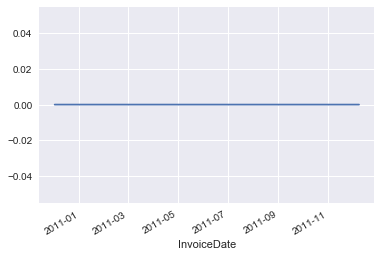

In [34]:
minus['Quantity'] = minus.apply(lambda x: abs(x.Quantity), axis=1)
minus['TotalOrderPrice'] = minus.apply(lambda x: x.Quantity * x.UnitPrice, axis=1)
# minus['TotalOrderPrice'].plot()

In [45]:
minus = minus.reset_index(drop=True)
minus.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,new_description,TotalOrderPrice
0,536589,21777,NaN,10,0.0,NaN,United Kingdom,None,0.0
1,536764,84952C,NaN,38,0.0,NaN,United Kingdom,None,0.0
2,536996,22712,NaN,20,0.0,NaN,United Kingdom,None,0.0
3,536997,22028,NaN,20,0.0,NaN,United Kingdom,None,0.0
4,536998,85067,NaN,6,0.0,NaN,United Kingdom,None,0.0


In [8]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [12]:
# to get only strings; there was one row that had a description of 20713 - not sure what that is so removed that
data = data[pd.to_numeric(data.Description, errors='coerce').isnull()]

In [10]:
x = 0

for i in range(0,10):
    x = x + 1
    print(x)

1
2
3
4
5
6
7
8
9
10
